In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
#calling units of the CRS and the top 5 rows
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
historical_markers = gpd.read_file('../data/historicalmarkers.geojson')
print(historical_markers.shape)
historical_markers.head

(255, 9)


<bound method NDFrame.head of     number                                           location    latitude  \
0      120                Hume-Fogg High School, 700 Broadway   36.159303   
1       78      Belle Meade Boulevard at Warner Park entrance   36.083058   
2       94                 Union Street and Capitol Boulevard   36.163758   
3      215                                        Lock 2 Road   36.244216   
4      127       Smith Springs Road and Old Murfreesboro Road   36.096776   
..     ...                                                ...         ...   
250    196                       330 Dr. M.L.K. Jr. Boulevard   36.166414   
251    240                      301 Twenty-Fifth Avenue North    36.15272   
252    149                                  1600 Holly Street   36.175477   
253      5  W side of Benton Smith Road, \nSouth of Hardin...   36.088026   
254    173                         4000 Old Hickory Boulevard  36.2337552   

                                   marker_nam

In [4]:
historic_zip = gpd.sjoin(historical_markers, zipcodes, predicate = 'within')

In [5]:
historic_zip

,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,None,POINT (-86.78157 36.15930),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,-86.867129,1982,None,POINT (-86.86713 36.08306),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.78287,1995,None,POINT (-86.78287 36.16376),24,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
3,215,Lock 2 Road,36.244216,Lock 2 Park,"In 1888, the U.S. Army Corps of Engineers soug...",-86.70192,2020,None,POINT (-86.70192 36.24422),37,37214,6,NASHVILLE,165410.80552044208,674068994.30090332
4,127,Smith Springs Road and Old Murfreesboro Road,36.096776,Una Community,The Una community developed around the crossro...,-86.654516,2008,None,POINT (-86.65452 36.09678),17,37217,56,NASHVILLE,179866.56847992647,517579208.08972168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,196,330 Dr. M.L.K. Jr. Boulevard,36.166414,Freedman's Savings and Trust Company Bank,"In March 1865, Congress established the Freedm...",-86.780457,2019,None,POINT (-86.78046 36.16641),36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
251,240,301 Twenty-Fifth Avenue North,36.15272,Centennial Park Swimming Pool,"Opened in 1932, the pool served Nashville’s wh...",-86.813004,2022,None,POINT (-86.81300 36.15272),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
252,149,1600 Holly Street,36.175477,Bass Park,This .2-acre lot was purchased by East Nashvil...,-86.74195,2013,None,POINT (-86.74195 36.17548),13,37206,2,NASHVILLE,75782.862116030214,221537063.58166504
253,5,"W side of Benton Smith Road, \nSouth of Hardin...",36.088026,Battle of Nashville Shy's Hill,On this hill was fought the decisive encounter...,-86.808237,1968,X,POINT (-86.80824 36.08803),44,37215,38,NASHVILLE,158698.30754566603,424774478.15600586


In [6]:
historic_zip['zip'].value_counts()

zip
37203    50
37212    18
37208    18
37209    14
37210    13
37205    12
37206    12
37201    11
37013     8
37221     8
37204     8
37215     8
37219     7
37217     7
37214     6
37211     6
37218     5
37207     5
37220     5
37115     4
37138     4
37076     3
37228     3
37213     2
37072     2
37216     2
37189     1
37080     1
37027     1
Name: count, dtype: int64

In [7]:
sites_37206 = historic_zip.loc[historic_zip['zip'] == '37206']
sites_37206.shape

(12, 15)

In [8]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 6)

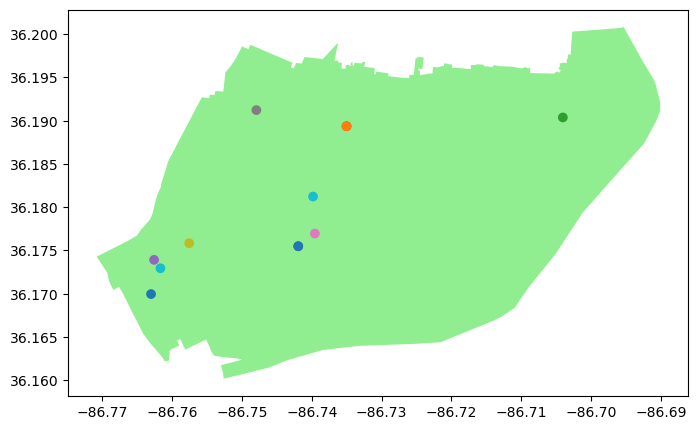

In [9]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
sites_37206.plot( ax = ax, column = 'marker_name');
plt.show();

In [10]:
polygon37206.geometry.centroid

C:\Users\Savannah\AppData\Local\Temp\ipykernel_42704\4245166938.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37206.geometry.centroid


13    POINT (-86.73098 36.18090)
dtype: geometry

In [11]:
center = polygon37206.geometry.centroid[13]
print(center)

POINT (-86.7309830626016 36.18089690922079)


C:\Users\Savannah\AppData\Local\Temp\ipykernel_42704\302457343.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37206.geometry.centroid[13]


In [12]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.18089690922079, -86.7309830626016]


In [18]:
#create our map of Nashville Zip Code 37206 and show it
map_37206 = folium.Map(location =  area_center, zoom_start = 12)
map_37206

In [14]:
i = 0
for row_index, row_values in sites_37206.iterrows():
    if i < 13: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 9
values are:
 
number                                                          161
location                                         1615 McEwen Avenue
latitude                                                  36.181223
marker_name                                Penny Campbell 1953-2014
marker_text       An activist for LGBT rights and advocate for p...
longitude                                                -86.739831
year_erected                                                   2017
civil_war_site                                                 None
geometry                               POINT (-86.739831 36.181223)
index_right                                                      13
zip                                                           37206
objectid                                                          2
po_name                                                   NASHVILLE
shape_stlength                                   75782.862116030214
shape_starea           

In [19]:
#draw our zip code area: 37206
historical_map_37206 = folium.Map(location =  area_center, zoom_start = 12)


#adding polygon to the map
folium.GeoJson(polygon37206).add_to(map_37206)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in sites_37206.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'])
    icon=folium.Icon(color="blue",icon="binoculars", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(historical_map_37206)
historical_map_37206.save('../maps/historicalmap37206.html')

#display our map
historical_map_37206